<a href="https://colab.research.google.com/github/khanabdulmajid/tensorflow_deep_learning/blob/main/Dog_Breed_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdulmajidkhan","key":"70ca7002de2a12ed114a455efab76102"}'}

In [2]:
!pip install -q kaggle

In [3]:
#the kaggle API client expects this file to be in ~/.kaggle so move it there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

# this permission change avoids a warning oin kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
! mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [6]:
!kaggle datasets list -s dog

ref                                            title                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------  -----------------------------------  -----  -------------------  -------------  ---------  ---------------  
tongpython/cat-and-dog                         Cat and Dog                          218MB  2018-04-26 10:56:50          97773       1113  0.75             
dansbecker/hot-dog-not-hot-dog                 Hot Dog - Not Hot Dog                 89MB  2018-07-19 05:52:04           6563        124  0.625            
marshuu/dog-breeds                             Dog breeds                             3KB  2022-12-20 18:49:43           2150         53  1.0              
jessicali9530/stanford-dogs-dataset            Stanford Dogs Dataset                750MB  2019-11-13 06:20:35          43274        964  0.75             
shaunthesheep/microsoft-catsvsdogs-dataset     Cats-vs-Dogs     

In [7]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           4838          8  0.1764706        


In [8]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp

 99% 686M/691M [00:05<00:00, 169MB/s]
100% 691M/691M [00:05<00:00, 132MB/s]


In [9]:
%cd ..

/content


In [ ]:
!unzip /content/dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm /content/dog_dataset/dogbreedidfromcomp.zip

In [11]:
!rm /content/dog_dataset/sample_submission.csv

#Important library



In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm

In [13]:
train_directory="/content/dog_dataset/train"
test_directory="/content/dog_dataset/test"

In [14]:
label_all=pd.read_csv("/content/dog_dataset/labels.csv")

In [15]:
label_all.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [16]:
breeds_all=label_all["breed"]
breed_counts=breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [17]:
# We will be working with 3 classes
CLASS_NAMES=["scottish_deerhound","maltese_dog","bernese_mountain_dog"]
labels=label_all[(label_all["breed"].isin(CLASS_NAMES))]
labels=labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [18]:
# BATCH_SIZE=32
# train_data=tf.keras.preprocessing.image_dataset_from_directory(train_directory,
#                                                                labels=labels,
#                                                                label_mode="categorical",
#                                                                batch_size=BATCH_SIZE)

In [19]:
from sklearn.preprocessing import label_binarize
X_data = np.zeros((len(labels),224,224,3),dtype="float32")
Y_data=label_binarize(labels["breed"],classes=CLASS_NAMES)

In [20]:
path="/content/dog_dataset/train/"
for i in tqdm(range(len(labels))):

  directory=path+labels["id"][i]+".jpg"
  img=tf.keras.utils.load_img(directory,target_size=(224,224))
  img=tf.keras.utils.img_to_array(img)
  x=np.expand_dims(img.copy(),axis=0)
  X_data[i]=x/255.0

100%|██████████| 357/357 [00:00<00:00, 445.75it/s]


In [21]:
X_data.shape, Y_data.shape

((357, 224, 224, 3), (357, 3))

# Building a CNN Model

In [53]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=2))



model.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(rate=0.80))
model.add(Dense(128,activation="relu"))
model.add(Dropout(rate=0.80))
model.add(Dense(64,activation="relu"))
model.add(Dense(len(CLASS_NAMES),activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=["accuracy"])



In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 64)       

In [56]:
from sklearn.model_selection import train_test_split

# splitting the data
X_train_and_val, X_test, Y_train_and_val, Y_test= train_test_split(X_data,Y_data,test_size=0.1)

# spliting data into training and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val,test_size=0.3)

In [57]:
epochs=100
batch_size=128
# checkpoint_path="/content/modelcheckpoint/model.ckpt"
# checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
#                                                       monitor="val_accuracy")

history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val,Y_val),
    epochs=epochs,
    batch_size=batch_size,
          )

Epoch 1/100
2/2 [==============================] - 11s 8s/step - loss: 1.1301 - accuracy: 0.3259 - val_loss: 1.0900 - val_accuracy: 0.3505
Epoch 2/100
2/2 [==============================] - 1s 352ms/step - loss: 1.0974 - accuracy: 0.3750 - val_loss: 1.0898 - val_accuracy: 0.3505
Epoch 3/100
2/2 [==============================] - 1s 355ms/step - loss: 1.1196 - accuracy: 0.3304 - val_loss: 1.0913 - val_accuracy: 0.4124
Epoch 4/100
2/2 [==============================] - 1s 378ms/step - loss: 1.1017 - accuracy: 0.3482 - val_loss: 1.0943 - val_accuracy: 0.3608
Epoch 5/100
2/2 [==============================] - 1s 350ms/step - loss: 1.0955 - accuracy: 0.3393 - val_loss: 1.0947 - val_accuracy: 0.3505
Epoch 6/100
2/2 [==============================] - 1s 305ms/step - loss: 1.0833 - accuracy: 0.4330 - val_loss: 1.0949 - val_accuracy: 0.3505
Epoch 7/100
2/2 [==============================] - 1s 347ms/step - loss: 1.1071 - accuracy: 0.3214 - val_loss: 1.0957 - val_accuracy: 0.3505
Epoch 8/100
2/2

In [58]:
from matplotlib import pyplot as plt


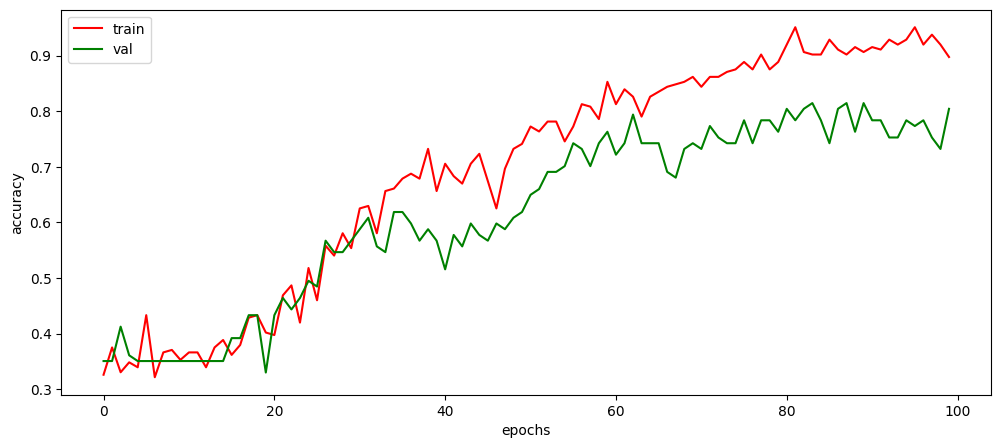

In [60]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='g')
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['train','val'])

plt.show()

In [61]:
ypred=model.predict(X_test)
score=model.evaluate(X_test,Y_test)
# print("accuarcy over the test set: \n",round(score[1]*100))

2/2 [==============================] - 0s 12ms/step - loss: 0.7380 - accuracy: 0.8056


In [62]:
score[1]

0.8055555820465088

In [87]:
img=tf.keras.utils.load_img(
    "/content/image.jpg",
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

In [92]:
imgArray=tf.keras.utils.img_to_array(img,)

In [94]:
img=tf.image.resize(imgArray, (224,224))
img_expand=tf.expand_dims(img,axis=0)

In [95]:
img_expand.shape

TensorShape([1, 224, 224, 3])

In [96]:
CLASS_NAMES[np.argmax(model.predict(img_expand))]

1/1 [==============================] - 0s 21ms/step


'scottish_deerhound'

In [97]:
import cv2
from google.colab.patches import cv2_imshow

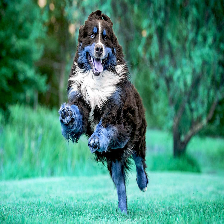

In [98]:
cv2_imshow(imgArray)

In [99]:
model.save("dogbreed.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
